In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Table of Contents
*   [Why?](#why)
*   [Initial View of Data](#initial)
*   [How often do these networks post?](#posts)
*   [Views](#view)
    *   [Distribution of Views](#distribution_views)
    *   [Most Viewed Videos](#most_viewed)


*  [Likes by Number of Views](#likes)
*   [Comments Per Video](#comments)
    *   [Number of Videos with Comments Closed](#comments_closed)

*   [Analyzing Title Text with NLTK](#Title)
    *   [Word Frequency](#word)
    *   [Bigram Frequency](#bigram)












<a name="why"></a>
#### I really enjoy politics and understand that topics can be super controversial and media networks fuel this controversy. I wanted to analyze the channels of Fox News and CNN and their video postings to determine what topics their sharing with their viewers. I also want to observe the networks user engagement. Some questions that I would like to answer:
1. How often a network post videos?
2. What topic are the videos in each video about?
3. What is the average number of views each network recieves per video?
4. What percentage of viewers like a video?
5. What is the average number of views comments each network recieves per video?
6. What are the top 10 most viewed/liked videos for each network? What was the video about that gave it so many videos?

<a name="initial"></a>
## Data

In [2]:
# read data
df = pd.read_csv('YoutubeVids.csv', index_col=0)

In [3]:
# head of dataframe
df.head()

,vid_ID,channel_title,description,time_published,title,view_count,like_count,comment_count
0,enkiA-RmAK0,CNN,Members of the House Select Committee investig...,2021-12-17,Jan 6 investigators believe Nov. 4 text pushin...,73020.0,2007.0,1351.0
1,33X9-EEbJYU,CNN,Former police officer Kim Potter broke down on...,2021-12-17,Kim Potter breaks down on the stand during tes...,69997.0,676.0,2068.0
2,IeSo_o1O5J8,CNN,A House oversight committee report reveals tha...,2021-12-17,New damning report about Trump’s response to C...,350706.0,9515.0,6029.0
3,ESWScbGOB4I,CNN,Dr. Sanjay Gupta follows several families who ...,2021-12-17,‘Miracle’: See impact marijuana had on autisti...,76971.0,2962.0,1230.0
4,1aP7FE0ws0s,CNN,A judge in Delaware has found that Fox News' c...,2021-12-17,Dominion Voting wins key decision in lawsuit a...,285136.0,8202.0,3634.0


In [4]:
# What is the range of dates for the video?
print('The newest video in our dataset was posted by CNN on ' + str(df[df['channel_title'] == 'CNN']['time_published'].max()))
print('The oldest video in our dataset was posted by CNN on ' + str(df[df['channel_title'] == 'CNN']['time_published'].min()))
print('The newest video in our dataset was posted by Fox News on ' + str(df[df['channel_title'] == 'Fox News']['time_published'].max()))
print('The oldest video in our dataset was posted by Fox News on ' + str(df[df['channel_title'] == 'Fox News']['time_published'].min()))

The newest video in our dataset was posted by CNN on 2021-12-17
The oldest video in our dataset was posted by CNN on 2021-09-01
The newest video in our dataset was posted by Fox News on 2021-12-17
The oldest video in our dataset was posted by Fox News on 2021-11-07


We can see that there is about 3 months of videos in our dataset for CNN and about a month for Fox News. I collected 1000 of the most recent videos for each network so Fox News may post the most videos.

<a name="posts"></a>
## How often do the Networks post videos?

In [5]:
# average postings per day for both networks
avg_CNNPost = df[df['channel_title']== 'CNN'].groupby('time_published').size().mean()
avg_FoxPost = df[df['channel_title']== 'Fox News'].groupby('time_published').size().mean()

print('On Average CNN post '+ str(round(avg_CNNPost, 2)) + ' videos per day.')
print('On Average Fox News post '+ str(round(avg_FoxPost, 2)) + ' videos per day.')

On Average CNN post 9.35 videos per day.
On Average Fox News post 24.39 videos per day.


<function matplotlib.pyplot.show>

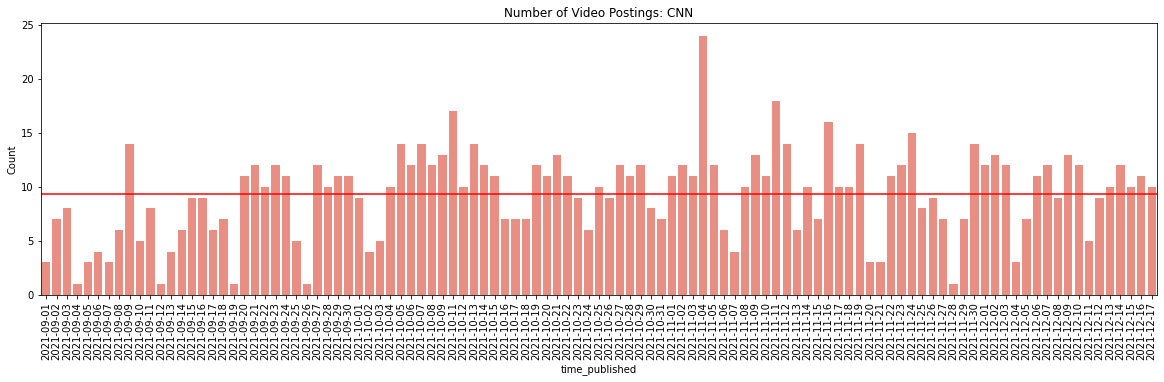

In [6]:
# distribution of postings by date for both networks
plt.figure(figsize = (20,5))
postPerDate = df[df['channel_title']== 'CNN'].groupby('time_published').size().reset_index(name='Count')
ax = sns.barplot(x = 'time_published', y = 'Count', data=postPerDate, color="salmon")
plt.xticks(rotation = 90)
ax.axhline(y=round(avg_CNNPost, 2), color = 'r')
ax.set_title('Number of Video Postings: CNN')
plt.show

<function matplotlib.pyplot.show>

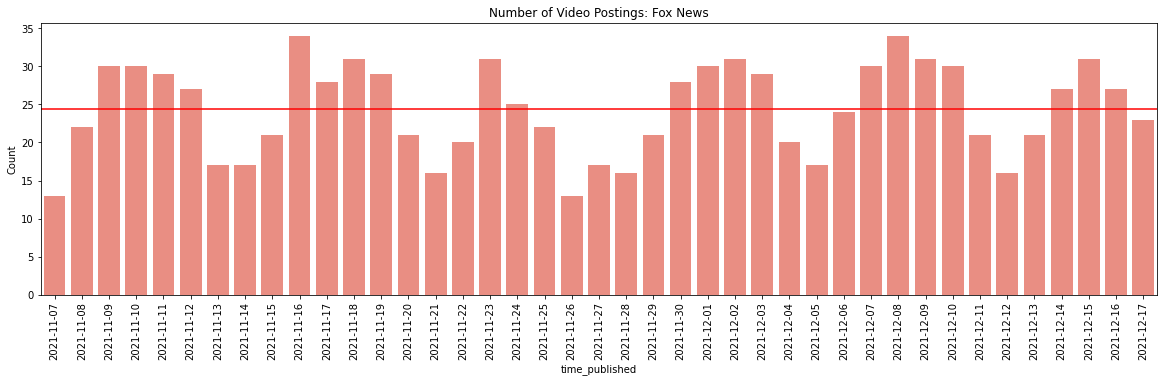

In [7]:
# distribution of postings by date for both networks
plt.figure(figsize = (20,5))
postPerDate = df[df['channel_title']== 'Fox News'].groupby('time_published').size().reset_index(name='Count')
ax = sns.barplot(x = 'time_published', y = 'Count', data=postPerDate, color="salmon")
plt.xticks(rotation = 90)
line = ax.axhline(y=round(avg_FoxPost, 2), color = 'r')
ax.set_title('Number of Video Postings: Fox News')
plt.show

As we could tell just from the fact that there was a wider range of dates for the CNN videos. Fox News post an average of 24 videos per day as opposed to CNN who post on average 9 videos per day.

<a name="view"></a>
## View Count

<a name="distribution_views"></a>
### Distribution of Views

<AxesSubplot:title={'center':'Fox News Distribution of Views'}, xlabel='view_count', ylabel='Count'>

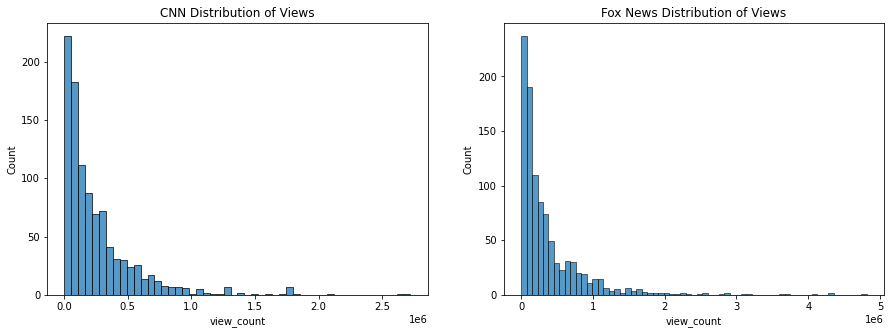

<Figure size 720x360 with 0 Axes>

In [8]:
# distribution of likes
fig, ax = plt.subplots(1, 2 , figsize=(15,5))
CNN_views = df[df['channel_title']== 'CNN']['view_count']
sns.histplot(CNN_views, ax = ax[0])
ax[0].set_title('CNN Distribution of Views')

# distribution of likes
plt.figure(figsize=(10,5))
Fox_views = df[df['channel_title']== 'Fox News']['view_count']
ax[1].set_title('Fox News Distribution of Views')
sns.histplot(Fox_views, ax = ax[1])

Text(0.5, 1.0, 'Views without Outliers')

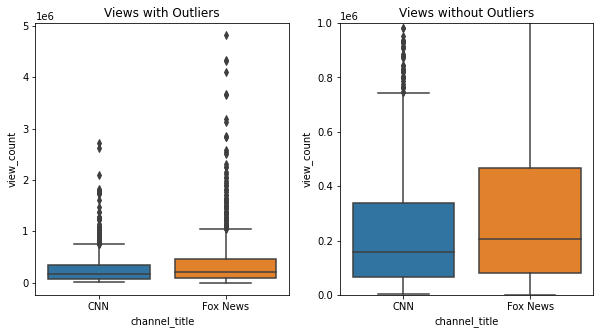

In [9]:
# box plot. with and without outliers
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(x = 'channel_title', y = 'view_count', data = df, ax = ax[0])
sns.boxplot(x = 'channel_title', y = 'view_count', data = df, ax = ax[1])
ax[1].set(ylim= (0,1000000))

ax[0].set_title('Views with Outliers')
ax[1].set_title('Views without Outliers')

We can see that Fox News has many videos that have a huge number of views. One video even had close to 5 million views. When we set a limit we can see that on average Fox News has a higher number of views per video. Let's see how that affects the number of likes.

<a name="most_viewed"></a>
### Most viewed videos

In [10]:
# What are the top 10 most viewed videos from each network
top_10_index = df[df['channel_title']== 'CNN']['view_count'].sort_values(ascending=False)[:10].index
df[df['channel_title'] == 'CNN'].iloc[top_10_index]

,vid_ID,channel_title,description,time_published,title,view_count,like_count,comment_count
408,qh1nDpR4TlI,CNN,At least eight people died and many others wer...,2021-11-06,See moment Travis Scott stops performance amid...,2719909.0,27338.0,12981.0
155,rwkvJpSFiTo,CNN,CNN's Adrienne Broaddus speaks with Oxford Hig...,2021-12-02,Student breaks down after learning classmate d...,2628612.0,67001.0,11362.0
125,4gIuyFixgaU,CNN,Prominent Christian televangelist and anti-vac...,2021-12-05,Preacher who spread vaccine lies dies after be...,2099997.0,20483.0,30652.0
936,mawvx3Daad8,CNN,Former President Trump and his inner circle we...,2021-09-13,Hear the calls Trump made as he tried to steal...,1823158.0,34202.0,21786.0
771,Rp0melxXhho,CNN,"""The Daily Show"" contributor Jordan Klepper hi...",2021-10-03,'How do surgeons do it?': Comedian Jordan Klep...,1795735.0,36795.0,9745.0
557,eML-Ty9IW7A,CNN,"""The Daily Show"" correspondent Jordan Klepper ...",2021-10-23,'Daily Show's' Klepper reveals what happened a...,1786090.0,35245.0,13006.0
421,ewKg8DkwcLc,CNN,CNN obtained exclusive video that shows Trump ...,2021-11-05,Rudy Giuliani challenged under oath on his ele...,1764491.0,26769.0,10545.0
243,s_cKKrwWmdM,CNN,"Kelly Davis, who witnessed the parade tragedy ...",2021-11-23,'There were people running everywhere screamin...,1756254.0,5039.0,7728.0
950,hQO9upB7kx8,CNN,"Mary Quintanilla, a Facebook user with over 3,...",2021-09-10,CNN reporter shows Trump supporter her debunke...,1752943.0,26325.0,16921.0
490,feJz1bxd-fw,CNN,Specifics about former President Donald Trump'...,2021-10-30,Court filings reveal what Trump is trying to k...,1751634.0,26332.0,23303.0


In [11]:
# to better see what videos were about by title
df[df['channel_title']== 'CNN'].iloc[top_10_index]['title'].values

array(['See moment Travis Scott stops performance amid deadly incident',
       'Student breaks down after learning classmate died in shooting',
       'Preacher who spread vaccine lies dies after being hospitalized with Covid-19',
       'Hear the calls Trump made as he tried to steal the election',
       "'How do surgeons do it?': Comedian Jordan Klepper takes on anti-mask parents",
       "'Daily Show's' Klepper reveals what happened at Trump rally",
       'Rudy Giuliani challenged under oath on his election lies',
       "'There were people running everywhere screaming': Witness describes Wisconsin parade tragedy",
       'CNN reporter shows Trump supporter her debunked Facebook posts. See her reaction',
       'Court filings reveal what Trump is trying to keep secret from Congress'],
      dtype=object)

CNNs top viewed videos seem to have a diversity in topics such as the Travis Scott concert incident. Theres some talk about Trump. 

In [12]:
# fox top 10 
top_10_index = df[df['channel_title']== 'Fox News']['view_count'].sort_values(ascending=False)[:10].index
df.iloc[top_10_index]

,vid_ID,channel_title,description,time_published,title,view_count,like_count,comment_count
1611,Xm7_wSuahXY,Fox News,Kyle Rittenhouse calls on the president to wat...,2021-11-23,Kyle Rittenhouse has a message for Biden,4816489.0,177863.0,26886.0
1612,do7sbWaZstQ,Fox News,'Tucker Carlson Tonight' host speaks to Kyle R...,2021-11-23,Kyle Rittenhouse speaks to Tucker Carlson in f...,4335759.0,204197.0,33208.0
1397,QlBTKmVVOOQ,Fox News,Former President Donald Trump slams President ...,2021-12-02,Trump torches Biden in 'Fox & Friends' intervi...,4319078.0,113439.0,32164.0
1379,AZC7Y_fPiWw,Fox News,Tucker Carlson reviewed the evidence of actor ...,2021-12-03,Tucker: How did anyone fall for this hoax?,4108201.0,125278.0,20464.0
1958,kujtF7tZ1Zk,Fox News,'Gutfeld!' panel reacts to debunked Steele dos...,2021-11-09,Gutfeld: This is why the hugest story on Earth...,3684735.0,96283.0,9335.0
1649,XkIqEIecCWg,Fox News,'Big Saturday Show' panel weighs in on demonst...,2021-11-21,Protests erupt in American cities over Kyle Ri...,3660744.0,92658.0,0.0
1670,YMdIAK59GYA,Fox News,'Tucker Carlson Tonight' host excoriates Democ...,2021-11-20,Tucker: This drives Democrats insane about Rit...,3191231.0,144027.0,24668.0
1902,ykxlfcErSYs,Fox News,‘Tucker Carlson Tonight’ host reacts to the ‘i...,2021-11-11,Tucker: This is terrifying and unnerving,3122999.0,127678.0,16819.0
1669,ULKliErI2IA,Fox News,Nick Sandmann joins ‘Hannity’ for an exclusive...,2021-11-20,Nick Sandmann speaks out on Rittenhouse verdic...,2849175.0,97243.0,13895.0
1904,kYDxpVKQH_w,Fox News,'The Five' panel discuss day seven of the Ritt...,2021-11-11,'The Five' react to Kyle Rittenhouse testimony,2836447.0,55382.0,16030.0


In [13]:
# fox news titles top 10
df.iloc[top_10_index]['title'].values

array(['Kyle Rittenhouse has a message for Biden',
       'Kyle Rittenhouse speaks to Tucker Carlson in first TV interview',
       "Trump torches Biden in 'Fox & Friends' interview, says admin is destroying America",
       'Tucker: How did anyone fall for this hoax?',
       'Gutfeld: This is why the hugest story on Earth must vanish',
       'Protests erupt in American cities over Kyle Rittenhouse acquittal',
       'Tucker: This drives Democrats insane about Rittenhouse verdict',
       'Tucker: This is terrifying and unnerving',
       'Nick Sandmann speaks out on Rittenhouse verdict in Hannity exclusive',
       "'The Five' react to Kyle Rittenhouse testimony"], dtype=object)

We can see that there is a good amount of talk about the Kyle Rittenhouse trial that had just happened.



<a name="likes"></a>
## Likes Per Video

In [14]:
# Likes per video
df['likes_per_video'] = df['like_count'] / df['view_count']

<AxesSubplot:title={'center':'Fox News Distribution of Percentage of Likes Per Viewership'}, xlabel='likes_per_video', ylabel='Count'>

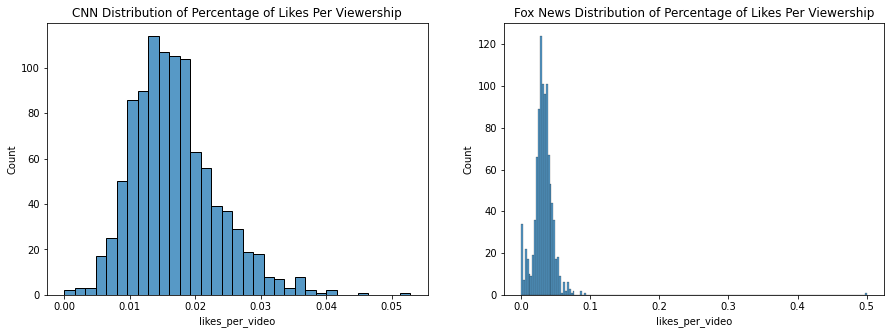

<Figure size 720x360 with 0 Axes>

In [15]:
fig, ax = plt.subplots(1, 2 , figsize=(15,5))
CNN_views = df[df['channel_title']== 'CNN']['likes_per_video']
sns.histplot(CNN_views, ax = ax[0])
ax[0].set_title('CNN Distribution of Percentage of Likes Per Viewership')

plt.figure(figsize=(10,5))
Fox_views = df[df['channel_title']== 'Fox News']['likes_per_video']
ax[1].set_title('Fox News Distribution of Percentage of Likes Per Viewership')
sns.histplot(Fox_views, ax = ax[1])

We can see that CNN has a normal distribution of Likes Per Viewership with this variable being in the low 1% to 5%. Fox News on the other hand seems to have an outlier that has close to 50%  likes per number of viewers ship. We can actually subset this video and open it in our browser to see if that's correct.


In [16]:
# greater than 0.5
fox_df = df[df['channel_title']== 'Fox News']
index = fox_df['likes_per_video'] > 0.1
fox_df[index]

,vid_ID,channel_title,description,time_published,title,view_count,like_count,comment_count,likes_per_video
1091,03BzO2xNeVM,Fox News,"St. Charles County, Missouri police Captain Ch...",2021-12-14,Looters take advantage of storm damage after d...,4.0,2.0,0.0,0.5


After checking the video above I found that it was removed and it only had a small number of views with 2 likes. That was why the likes per view percentage was high.

In [17]:
# drop row
update_df = df.drop([1091])

<AxesSubplot:title={'center':'Fox News Distribution of Percentage of Likes Per Viewership'}, xlabel='likes_per_video', ylabel='Count'>

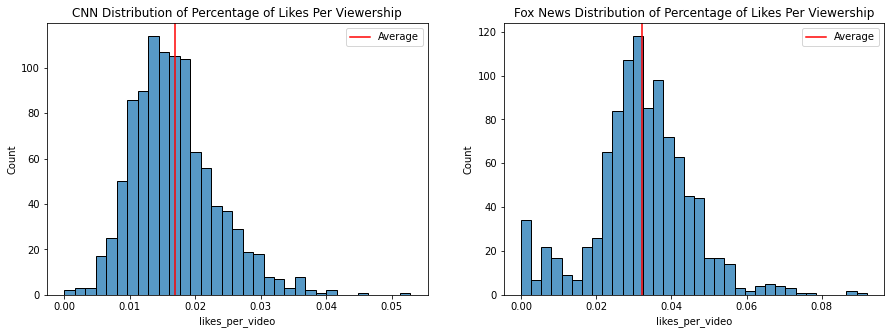

<Figure size 720x360 with 0 Axes>

In [18]:
# updated distributions
fig, ax = plt.subplots(1, 2 , figsize=(15,5))
CNN_views = update_df[update_df['channel_title']== 'CNN']['likes_per_video']
sns.histplot(CNN_views, ax = ax[0])
mean_CNN = update_df[update_df['channel_title']== 'CNN']['likes_per_video'].mean()
l1 = ax[0].axvline(x = mean_CNN, color = 'r')
l1.set_label('Average')
ax[0].legend(loc='best')
ax[0].set_title('CNN Distribution of Percentage of Likes Per Viewership')

plt.figure(figsize=(10,5))
Fox_views = update_df[update_df['channel_title']== 'Fox News']['likes_per_video']
mean_Fox = update_df[update_df['channel_title']== 'Fox News']['likes_per_video'].mean()
l2 = ax[1].axvline(x = mean_Fox, color = 'r')
l2.set_label('Average')
ax[1].legend(loc='best')
ax[1].set_title('Fox News Distribution of Percentage of Likes Per Viewership')
sns.histplot(Fox_views, ax = ax[1])

In [19]:
print(update_df[update_df['channel_title']== 'CNN']['likes_per_video'].mean())
print(update_df[update_df['channel_title']== 'Fox News']['likes_per_video'].mean())

0.016888324465287725
0.03218044874051949


As we can see the average percentage of likes to number of views is 1.6% for CNN and 3.2% for Fox News. So it does seem that there are more people who like the videos that Fox News post than CNN. It does still seem like these 1-3% number of likes per video are low. 

<a name='comments'></a>
## Comments

<AxesSubplot:title={'center':'Fox News: Comments Count Distribution'}, xlabel='comment_count', ylabel='Count'>

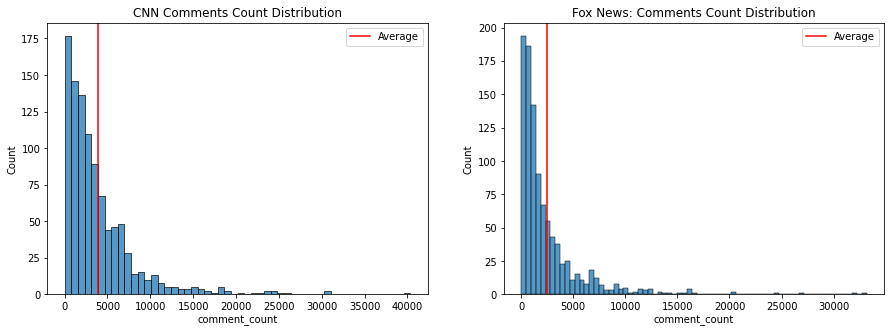

<Figure size 720x360 with 0 Axes>

In [20]:
# comments distribution
fig, ax = plt.subplots(1, 2 , figsize=(15,5))
CNN_views = update_df[update_df['channel_title']== 'CNN']['comment_count']
sns.histplot(CNN_views, ax = ax[0])
mean_CNN = update_df[update_df['channel_title']== 'CNN']['comment_count'].mean()
l1 = ax[0].axvline(x = mean_CNN, color = 'r')
l1.set_label('Average')
ax[0].legend(loc='best')
ax[0].set_title('CNN Comments Count Distribution')

plt.figure(figsize=(10,5))
Fox_views = update_df[update_df['channel_title']== 'Fox News']['comment_count']
mean_Fox = update_df[update_df['channel_title']== 'Fox News']['comment_count'].mean()
l2 = ax[1].axvline(x = mean_Fox, color = 'r')
l2.set_label('Average')
ax[1].legend(loc='best')
ax[1].set_title('Fox News: Comments Count Distribution')
sns.histplot(Fox_views, ax = ax[1])

In [21]:
# see percentage of comments per video
update_df['comment_per_video'] = update_df['comment_count'] / update_df['view_count']

In [22]:
# head
update_df.head()

,vid_ID,channel_title,description,time_published,title,view_count,like_count,comment_count,likes_per_video,comment_per_video
0,enkiA-RmAK0,CNN,Members of the House Select Committee investig...,2021-12-17,Jan 6 investigators believe Nov. 4 text pushin...,73020.0,2007.0,1351.0,0.027486,0.018502
1,33X9-EEbJYU,CNN,Former police officer Kim Potter broke down on...,2021-12-17,Kim Potter breaks down on the stand during tes...,69997.0,676.0,2068.0,0.009658,0.029544
2,IeSo_o1O5J8,CNN,A House oversight committee report reveals tha...,2021-12-17,New damning report about Trump’s response to C...,350706.0,9515.0,6029.0,0.027131,0.017191
3,ESWScbGOB4I,CNN,Dr. Sanjay Gupta follows several families who ...,2021-12-17,‘Miracle’: See impact marijuana had on autisti...,76971.0,2962.0,1230.0,0.038482,0.015980
4,1aP7FE0ws0s,CNN,A judge in Delaware has found that Fox News' c...,2021-12-17,Dominion Voting wins key decision in lawsuit a...,285136.0,8202.0,3634.0,0.028765,0.012745


<AxesSubplot:title={'center':'Fox News Distribution of Percentage of Comments Per Viewership'}, xlabel='comment_per_video', ylabel='Count'>

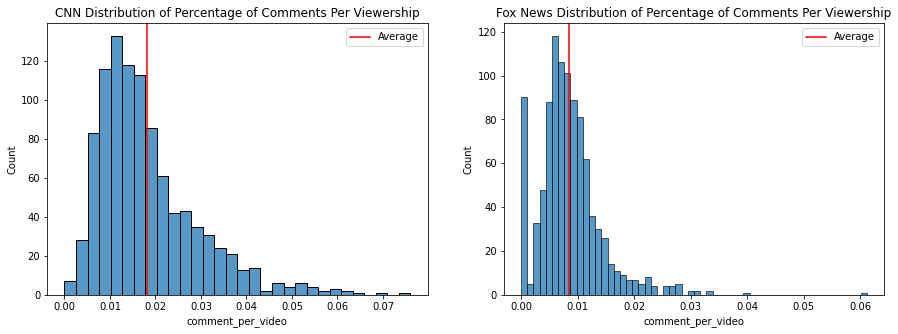

<Figure size 720x360 with 0 Axes>

In [23]:
# distribution of comment per video
fig, ax = plt.subplots(1, 2 , figsize=(15,5))
CNN_views = update_df[update_df['channel_title']== 'CNN']['comment_per_video']
sns.histplot(CNN_views, ax = ax[0])
mean_CNN = update_df[update_df['channel_title']== 'CNN']['comment_per_video'].mean()
l1 = ax[0].axvline(x = mean_CNN, color = 'r')
l1.set_label('Average')
ax[0].legend(loc='best')
ax[0].set_title('CNN Distribution of Percentage of Comments Per Viewership')

plt.figure(figsize=(10,5))
Fox_views = update_df[update_df['channel_title']== 'Fox News']['comment_per_video']
mean_Fox = update_df[update_df['channel_title']== 'Fox News']['comment_per_video'].mean()
l2 = ax[1].axvline(x = mean_Fox, color = 'r')
l2.set_label('Average')
ax[1].legend(loc='best')
ax[1].set_title('Fox News Distribution of Percentage of Comments Per Viewership')
sns.histplot(Fox_views, ax = ax[1])

The average number of comments for CNN is close to 2% and Fox News is less than 1%. When I was looking at the dataset I noticed that there were videos with 0 comments. This was because the comments were turned off. As we can see the distribution of the percentage of comments per video there is a high number of 0 in the Fox News distribution. 

<a name='comments_closed'></a>
### Number of Videos with Comments Closed

In [24]:
# There are 95 videos that have 0 comments
update_df[update_df['comment_count'] == 0]

,vid_ID,channel_title,description,time_published,title,view_count,like_count,comment_count,likes_per_video,comment_per_video
516,nNMF6MuYaSM,CNN,World leaders are gathering for a crucial clim...,2021-10-28,What is COP26?,32722.0,458.0,0.0,0.013997,0.0
564,KhK1PMze8Mo,CNN,The iPod was the hottest gadget of the early 2...,2021-10-22,How the iPod changed music forever,25361.0,446.0,0.0,0.017586,0.0
577,3Gw2T19WPeA,CNN,"In May 2020, Jennifer Bates was just a woman i...",2021-10-21,Woman fights to unionize Amazon,9173.0,352.0,0.0,0.038373,0.0
721,DD-qUmvekjo,CNN,ChowNow CEO Chris Webb talks with CNN Business...,2021-10-07,ChowNow CEO discusses the future of food delivery,9953.0,159.0,0.0,0.015975,0.0
761,03kVu7LgCbg,CNN,Tanitoluwa “Tani” Adewumi is a young chess pla...,2021-10-04,The 11-year-old chess master who fled Boko Har...,15498.0,819.0,0.0,0.052846,0.0
...,...,...,...,...,...,...,...,...,...,...
1911,e4PoDTArfGo,Fox News,Fox News contributor and civil rights attorney...,2021-11-10,Kyle Rittenhouse breaks down in tears on witne...,543334.0,0.0,0.0,0.000000,0.0
1960,4QxmoI8Ujuc,Fox News,Barstool Sports founder Dave Portnoy responds ...,2021-11-09,Dave Portnoy hits back at 'sleazy' hit piece o...,697251.0,21647.0,0.0,0.031046,0.0
1971,oc9H8a7no88,Fox News,'Outnumbered' panel discusses President Biden ...,2021-11-08,Biden's actions send the message that he doesn...,403245.0,14405.0,0.0,0.035723,0.0
1989,wZDvWH45BUQ,Fox News,Fox News contributor Mike Huckabee discussed t...,2021-11-07,Vaccine mandate halted for larger companies,705486.0,25247.0,0.0,0.035787,0.0


Text(0.5, 1.0, 'Number of Videos Where Comments Are Turned Off')

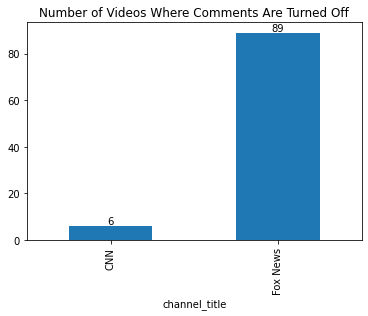

In [25]:
ax = update_df[update_df['comment_count'] == 0].groupby('channel_title').size().plot(kind='bar')
ax.bar_label(ax.containers[0])
ax.set_title('Number of Videos Where Comments Are Turned Off')

As we can see Fox News has 89 videos that have comments closed opposed to 6 for CNN. There may be different reasons why they close comments for example if a topic is controversial.

<a name='Title'></a>
## Analyzing Title Text with NLTK

My next objective in this analysis is to determine what topics each network focused on.

In [26]:
# tokenize words
token_title = update_df.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)

# tokens for each network
cnn_tokens = [item for sublist in list(token_title[:1000]) for item in sublist]
fox_tokens = [item for sublist in list(token_title[1000:]) for item in sublist]

In [27]:
def preprocess_words(words):
  ## takes a  list of words to preprocess

  # stemming and to remove stop words
  stemmer = SnowballStemmer("english")
  stop_words = stopwords.words('english')

  # processing
  filtered_list = [word for word in words if word.casefold() not in stop_words]
  words_only = [word for word in filtered_list if word.isalnum()]
  stemmed_words =[stemmer.stem(word) for word in words_only]

  return stemmed_words

In [28]:
# clean tokens
cnn_tokens_clean = preprocess_words(cnn_tokens)
fox_tokens_clean = preprocess_words(fox_tokens)

<a name='word'></a>
### Word Frequency

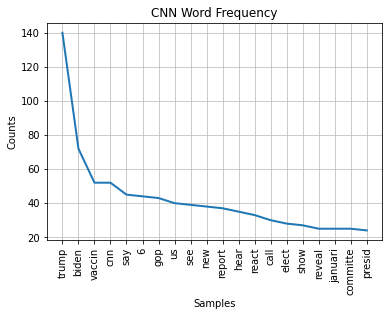

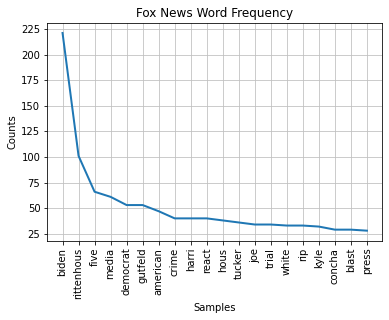

In [29]:
# plot to show frequencies of words found in title for cnn
freq = nltk.FreqDist(cnn_tokens_clean)
freq.plot(20, cumulative=False, title = 'CNN Word Frequency')

# plot to show frequencies of words found in title for fox
freq = nltk.FreqDist(fox_tokens_clean)
freq.plot(20, cumulative=False, title = 'Fox News Word Frequency')
plt.show()

From the graphs above we can see that Trump was CNNs most mentioned word and Biden was Fox News most mentioned word. We can assume that they were probably not nice titles. CNN also mentions the vaccine and 6 which could refer to January 6 incident. Rittenhouse was another big topic for Fox News because they were strongly supporting him.

<a name='bigram'></a>
### Bigram Frequency

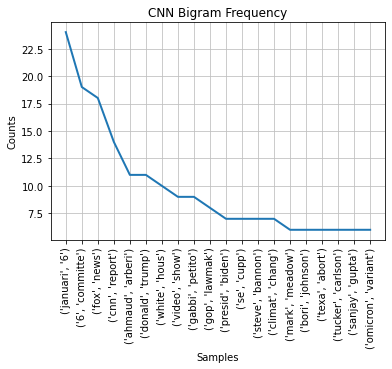

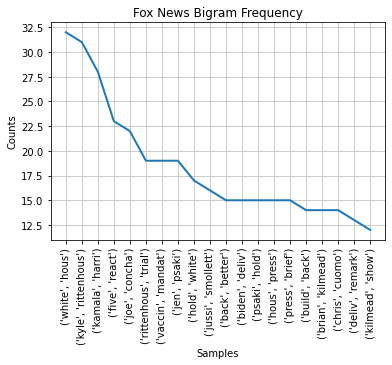

In [30]:
# cnn bigrams
bigrams = nltk.bigrams(cnn_tokens_clean)
freq = nltk.FreqDist(bigrams)
freq.plot(20, cumulative=False, title = 'CNN Bigram Frequency')

# fox News bigrams
bigrams = nltk.bigrams(fox_tokens_clean)
freq = nltk.FreqDist(bigrams)
freq.plot(20, cumulative=False, title = 'Fox News Bigram Frequency')

Our bigrams plots above show that indeed CNN had alot of titles that contained January 6 and Committee which refer to the incident at the capital. Fox News mentioned the White House and Kyle Rittenhouse alot in their titles so we can conclude these were some of the most important topics.

## Conclusion
In conclusion I found that:
- Fox News is more active in their channel by uploading more videos per day than CNN. 
- Fox News users also like more videos on average than CNNs viewers by a margin of 2%. 
- For both networks the majority of videos have less than 1 million views, but there are some outliers that have 5 millions views. These tend to be very important national topics such as Kyle Rittenhouse and Travis Scott concert.
- Both networks have even a small margin of users that comment ranging from 1-2% on average.
- Fox News has close to 9% of comments closed on their videos.
- From our titles we can conclude that some of the most important topics for CNN was the January 6th incident and the Ahmaud Arbery trial.
- Fox News most important topics were Kyle Rittenhouse and the vaccine mandate.